《在电子学习产品中找到两个最佳广告市场》

在这个项目中，我们将力图找到两个最好的市场来宣传我们的产品-我们正在与一家提供编程课程的电子学习公司合作。 我们的大多数课程都是关于Web和移动开发的，但是我们还涵盖了许多其他领域，例如数据科学，游戏开发等。

了解数据：

为了避免花钱组织调查，我们将首先尝试利用现有数据来确定我们是否可以获得可靠的结果。

freeCodeCamp的2017年《 New Coder Survey》是我们理想的候选人之一。 freeCodeCamp是一个免费的电子学习平台，提供有关Web开发的课程。 由于他们经营着受欢迎的Medium出版物（超过40万名追随者），因此他们的调查吸引了兴趣各异的新编码员（不仅是Web开发人员），这对于我们的分析而言是理想之选。

调查数据可在此GitHub存储库中公开获得。 下面，我们将快速浏览存储在我们刚刚提到的存储库的clean-data文件夹中的2017-fCC-New-Coders-Survey-Data.csv文件。 我们将在此处使用直接链接读取文件。

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('E:/学习资料/python数据分析/dataquest/第五单元/项目二/')

import matplotlib.pyplot as plt
%matplotlib inline  
pd.options.display.max_columns = 150 # to avoid truncated output 

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',engine = 'python')
print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

检查样品的代表性

正如我们在简介中提到的，我们的大多数课程都是关于Web和移动开发的，但是我们还涵盖了许多其他领域，例如数据科学，游戏开发等。出于分析的目的，我们希望回答有关总体的问题 对我们教授的课程感兴趣的新编码员。 我们想知道：

这些新的开发人员在哪里。

哪些位置的开发人员密度最高。

他们愿意花多少钱来学习。

因此，我们首先需要弄清楚数据集是否具有适合我们目的的人员类别。 JobRoleInterest列为每个参与者描述了他们感兴趣的工作角色。如果参与者对在特定领域工作感兴趣，则意味着他们也对学习该领域感兴趣。 因此，让我们看一下此列的频率分布表，并确定我们拥有的数据是否相关。

In [3]:
fre_fcc = fcc['JobRoleInterest'].value_counts()

上表中的信息非常详细，但是通过快速扫描，它看起来像：

很多人对Web开发感兴趣（全栈Web开发，前端Web开发和后端Web开发）。
一些人对移动开发感兴趣。
除了Web和移动开发之外，其他人对其他领域也很感兴趣。
有趣的是，许多受访者对一个以上的主题感兴趣。 更好地了解有多少人对一个主题感兴趣，以及有多少人对兴趣混杂，这将很有用。 因此，在下一个代码块中，我们将：

在JobRoleInterest列中拆分每个字符串，以找到每个参与者的选项数量。
首先，我们将删除空值，因为我们无法分割Nan值。
为变量生成一个频率表，描述选项的数量。

In [4]:
interests_no_null = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_null.str.split(',')

n_of_options = splitted_interests.apply(lambda x : len(x))
n_of_options.value_counts(normalize = True).sort_index()

1     0.316505
2     0.108839
3     0.158896
4     0.152174
5     0.120423
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
11    0.001859
12    0.003003
13    0.000286
Name: JobRoleInterest, dtype: float64

事实证明，只有31.7％的参与者清楚地知道他们想从事哪些编程领域的工作，而绝大多数学生的兴趣却参差不齐。 但是，鉴于我们提供了有关各个主题的课程，因此新编码员的兴趣浓厚这一事实实际上可能对我们有利。

我们课程的重点是网络和移动开发，因此让我们找出有多少受访者选择了这两个选项中的至少一个。

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


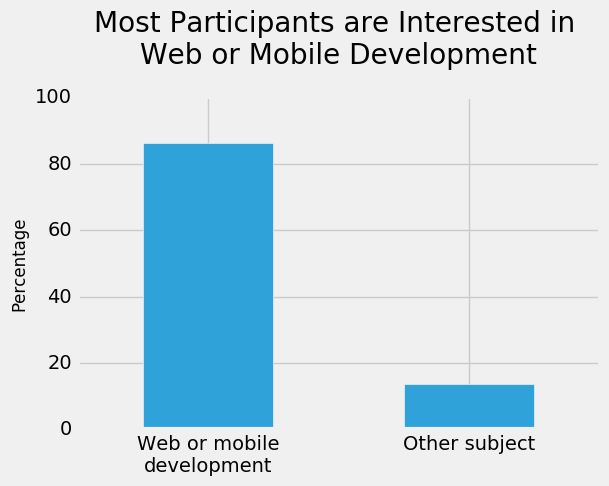

In [5]:
web_or_mobile = interests_no_null.str.contains('Web Develop|Mobile Develop')
fre_table = web_or_mobile.value_counts(normalize = True)*100
print(fre_table)

plt.style.use('fivethirtyeight')
fre_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

事实证明，本次调查的大多数人（约86％）对网络或移动开发感兴趣。这些数字为我们考虑此样本代表我们的关注人群提供了强有力的理由。我们想向对各种编程领域感兴趣的人宣传我们的课程，但主要是对Web和移动开发的兴趣。

现在，我们需要找出最佳的市场来投资来宣传我们的课程。我们想知道：

这些新的编码器在哪里。
新编码器数量最多的位置是哪些？
新编码员愿意花多少钱来学习。
新编码员-位置和密度
让我们从找出这些新编码器的位置以及每个位置的密度（有多少新编码器）开始。这应该是找到可以投放我们的广告系列的最佳两个市场的良好起点。

数据集提供有关每个参与者在国家/地区级别上的信息。我们可以将每个国家/地区视为一个单独的市场，因此我们可以将目标定为找到要在其中做广告的两个最佳国家/地区。

我们可以从检查CountryLive变量的频率分布表开始，该表描述了每个参与者所居住的国家（而不是其原籍国）。我们将仅考虑那些回答了他们感兴趣的角色的参与者，以确保我们与代表性样本一起工作。

In [36]:
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True)*100
absolute_frequencies = fcc_good['CountryLive'].value_counts()

pd.DataFrame({'Absolute frequency':absolute_frequencies,'Relative frequency':relative_frequencies}).head()

,Absolute frequency,Relative frequency
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92


我们有45.7％的潜在客户位于美国，这绝对是最有趣的市场。印度是第二大客户密度，但仅为7.7％，与英国（4.6％）或加拿大（3.8％）相差不远。

这是有用的信息，但是我们需要做的比这更深入，并弄清楚人们实际上愿意在学习上花费多少钱。在大多数人只愿意免费学习的高密度市场上做广告，对我们来说极不可能获利。

花钱学习
MoneyForLearning列以美元描述参与者从开始编写代码到完成调查之间所花费的金钱。我们的公司以每月$ 59的价格出售订阅，因此，我们有兴趣了解每个学生每月花费多少钱。

我们将分析范围缩小到仅四个国家：美国，印度，英国和加拿大。我们这样做有两个原因：

这些国家/地区是上面频率表中频率最高的国家/地区，这意味着我们每个国家/地区的数据量都不错。
我们的课程是用英语编写的，英语在这四个国家/地区都是官方语言。懂英语的人越多，我们越有机会通过我们的广告定位合适的人。
让我们从创建一个新列开始，该列描述学生到目前为止每月花费的金额。为此，我们需要将MoneyForLearning列除以MonthsProgramming列。问题是一些学生回答说他们已经学习了0个月的编码（可能是他们刚刚开始）。为避免被0除，我们将在MonthsProgramming列中将0替换为1。

In [37]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

fcc_good['MonthsProgramming'].replace(0,1,inplace = True)

fcc_good = fcc_good[fcc_good['MoneyForLearning'].notnull()]
fcc_good = fcc_good[fcc_good['MonthsProgramming'].notnull()]
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

fcc_good['money per month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']

fcc_good[['money per month','CountryLive']].groupby('CountryLive').mean().loc[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

,money per month
CountryLive,
United States of America,228.00
India,135.10
United Kingdom,45.53
Canada,113.51


相对于我们看到的印度，英国和加拿大的结果有些令人惊讶。 如果我们考虑一些社会经济指标（例如人均GDP），我们可以直观地期望英国和加拿大的人们在学习上的花费要比印度的人更多。

可能是因为我们没有足够的英国和加拿大代表性数据，或者我们有一些离群值（可能来自错误的调查答案），使得印度的平均值过大，而英国和加拿大的平均值过低。 也可能是结果正确。

处理极端离群值:

让我们使用箱形图可视化每个国家的money_per_month变量的分布。

([<matplotlib.axis.XTick at 0xc646208>,
 <a list of 4 Text xticklabel objects>)

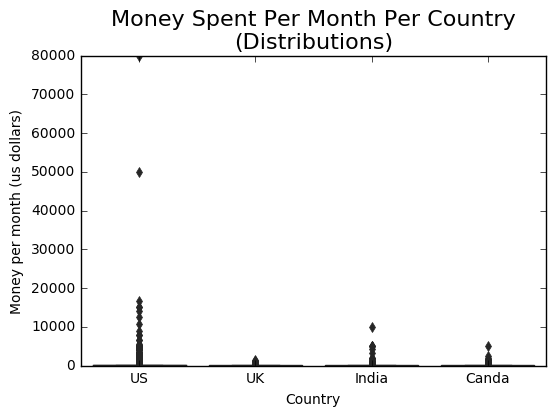

In [38]:
import seaborn as sns

only_4= fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x = 'CountryLive',y = 'money per month',data = only_4)

plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (us dollars)')
plt.xticks(range(4),['US','UK','India','Canda'])


很难在上面的图表上看到英国，印度或加拿大的数据是否有问题，但我们可以立即看到，美国真的有什么不对劲：两个人每月花在学习上的费用为$ 50000或更多 。 这并非不可能，但似乎极不可能，因此我们将删除每个月超过$ 20,000的值。

In [54]:
fcc_good = fcc_good[fcc_good['money per month'] < 20000]
fcc_good[['money per month','CountryLive']].groupby('CountryLive').mean().loc[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

,money per month
CountryLive,
United States of America,183.80
India,135.10
United Kingdom,45.53
Canada,113.51


([<matplotlib.axis.XTick at 0xbb65cf8>,
 <a list of 4 Text xticklabel objects>)

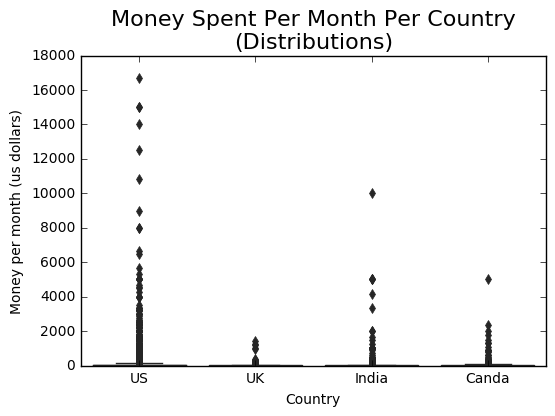

In [55]:
only_4= fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x = 'CountryLive',y = 'money per month',data = only_4)

plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (us dollars)')
plt.xticks(range(4),['US','UK','India','Canda'])


我们可以看到印度的一些极端异常值（每月价值超过2500美元），但尚不清楚这是否是好数据。 也许这些人参加了几次训练营，这往往很昂贵。 让我们检查这两个数据点，看看是否可以找到任何相关的东西。

In [42]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money per month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money per month
1728,24.00,0.00,nan,nan,NaN,nan,nan,"between 100,000 and 1 million",nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.00,nan,nan,male,NaN,nan,0.00,0.00,1.00,nan,0.00,nan,nan,30.00,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,nan,0.00,0.00,0.00,nan,Within the next 6 months,1.00,nan,nan,nan,1.00,nan,nan,nan,1.00,NaN,1.00,nan,1.00,work for a startup,1.00,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.00,4.00,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,nan,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,1.00,1.00,bachelor's degree,Computer Programming,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,5000.00
1755,20.00,0.00,nan,nan,NaN,nan,nan,more than 1 million,nan,nan,1.00,nan,nan,1.00,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.00,nan,nan,male,NaN,nan,0.00,0.00,1.00,nan,0.00,nan,nan,10.00,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,nan,0.00,0.00,0.00,nan,I haven't decided,nan,1.00,nan,1.00,1.00,1.00,nan,1.00,nan,NaN,nan,nan,nan,work for a multinational corporation,1.00,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.00,15.00,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,nan,nan,1.00,1.00,1.00,nan,1.00,nan,1.00,nan,1.00,1.00,nan,nan,NaN,1.00,nan,nan,nan,1.00,1.00,1.00,bachelor's degree,

似乎没有人参加训练营。 总体而言，从数据中很难确定这些人是否真的在学习上花费了那么多钱。 该调查的实际问题是“除了大学学费外，到目前为止，您还花了多少钱学习编码（以美元为单位）？”，因此他们可能会误解并认为其中包括大学学费。 删除这两行似乎更安全。


In [43]:
only_4 = only_4.drop(india_outliers.index) # using the row labels

回顾上面的方框图，我们还可以看到美国的极端异常值（每月价值超过6000美元）。 让我们更详细地研究这些参与者。

In [45]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money per month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money per month
718,26.00,1.00,0.00,0.00,The Coding Boot Camp at UCLA Extension,1.00,nan,more than 1 million,1.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.00,nan,nan,male,NaN,nan,0.00,0.00,0.00,nan,0.00,nan,nan,35.00,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.00,0.00,0.00,0.00,1.00,Within the next 6 months,1.00,nan,nan,nan,1.00,1.00,nan,nan,1.00,NaN,nan,nan,1.00,work for a startup,1.00,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.00,1.00,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,nan,1.00,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,bachelor's degree,Architecture,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,NaN,nan,nan,8000.00
1222,32.00,1.00,0.00,0.00,The Iron Yard,1.00,nan,"between 100,000 and 1 million",nan,nan,nan,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.00,nan,nan,female,NaN,nan,1.00,0.00,1.00,0.00,0.00,0.00,nan,50.00,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,nan,0.00,0.00,0.00,nan,Within the next 6 months,nan,nan,nan,nan,1.00,nan,nan,nan,1.00,NaN,nan,nan,1.00,work for a nonprofit,1.00,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.00,2.00,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,nan,nan,nan,na

这11个极端离群值中，有6人参加了训练营，这证明了在学习上花费了大量金钱是合理的。对于其他五个，很难从数据中找出他们本可以花那么多钱在学习上的地方。因此，我们将删除参与者报告他们每月花费6000澳元但从未参加过训练营的行。

此外，数据显示，八名受访者在完成调查时已经进行了不超过三个月的编程。他们很可能为要持续几个月的训练营支付了大笔资金，因此每月花费的钱是不切实际的，应该大大降低（因为他们可能在接下来的两个月中没有花任何钱）调查后的几个月）。因此，我们将删除这八个异常值。

在下一个代码块中，我们将删除以下响应者：

没有参加训练营。
他们完成调查时已经进行了不到三个月的编程。

In [47]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money per month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money per month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

再次看一下上面的最后一个方框图，我们还可以看到加拿大的极端局面-一个人每月花费大约\ $ 5000。 让我们更深入地研究这个人

In [48]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money per month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money per month
13659,24.00,1.00,0.00,0.00,Bloc.io,1.00,nan,more than 1 million,1.00,nan,1.00,nan,nan,nan,1.00,nan,nan,NaN,nan,nan,nan,nan,nan,1.00,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.00,nan,nan,male,NaN,nan,1.00,0.00,1.00,1.00,0.00,0.00,250000.00,10.00,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.00,1.00,1.00,0.00,0.00,I haven't decided,1.00,nan,1.00,nan,1.00,1.00,1.00,nan,1.00,NaN,1.00,nan,1.00,work for a multinational corporation,nan,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.00,2.00,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,nan,nan,nan,nan,nan,nan,nan,nan,1.00,NaN,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,NaN,nan,nan,1.00,nan,nan,nan,1.00,bachelor's degree,Finance,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,1.00,nan,NaN,nan,nan,5000.00


在这里，情况类似于某些美国受访者-该参与者完成调查后的编程时间不超过两个月。 在开始参加训练营时，他似乎已经花了大笔钱，然后在调查后的接下来几个月里，他可能没有花任何钱。 我们将采用与美国相同的方法，并删除该异常值。

In [49]:
only_4 = only_4.drop(canada_outliers.index)

In [51]:
only_4.groupby('CountryLive').mean()['money per month']

CountryLive
Canada                      93.07
India                       65.76
United Kingdom              45.53
United States of America   142.65
Name: money per month, dtype: float64

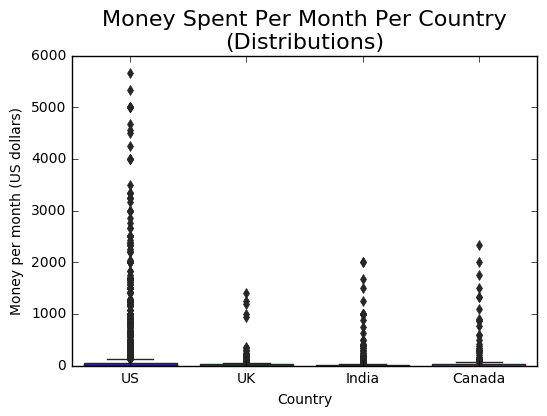

In [53]:
sns.boxplot(y = 'money per month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

择两个最佳市场
显然，我们应该做广告的国家是美国。 许多新的编码器居住在这里，他们愿意每月支付大量的钱（约143美元）。

我们以每月59美元的价格出售订阅，加拿大似乎是最好的第二选择，因为与印度（66美元）和英国（45美元）相比，加拿大的人们愿意每月支付大约93美元。

数据强烈表明我们不应该在英国做广告，但是让我们再看一下印度，然后再决定选择加拿大作为我们的第二佳选择：

对于印度人来说，59美元似乎并不算昂贵，因为他们每个月的平均支出为66美元。
我们在印度的潜在客户几乎是加拿大的两倍：

In [57]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America   74.90
India                      11.83
United Kingdom              7.13
Canada                      6.13
Name: CountryLive, dtype: float64

因此，在加拿大和印度之间选择什么还不清楚。尽管选择加拿大似乎更具诱惑力，但由于大量潜在客户，印度很有可能实际上是一个更好的选择。

此时，似乎我们有几种选择：

通过将广告预算分成各种组合来在美国，印度和加拿大做广告：

美国为60％，印度为25％，加拿大为15％。
美国为50％，印度为30％，加拿大为20％；等等
仅在美国和印度或美国和加拿大刊登广告。同样，合理分配广告预算是合理的。例如：

美国为70％，印度为30％。
美国为65％，加拿大为35％；等等
仅在美国刊登广告。

此时，最好将我们的分析结果发送给营销团队，让他们使用他们的领域知识来决定。他们可能想在印度和加拿大进行一些额外的调查，然后找我们分析新的调查数据。

结论
在这个项目中，我们分析了来自新编码员的调查数据，以找到最好的两个市场做广告。我们得出的唯一确凿的结论是，美国将是一个很好的广告市场。